In [4]:
import pandas as pd
import numpy as np


data_city = pd.read_csv("/home/elliot/DataSets/City.csv")
data_cab = pd.read_csv("/home/elliot/DataSets/Cab_Data.csv")
data_customer_id = pd.read_csv("/home/elliot/DataSets/Customer_ID.csv")
data_transaction_id = pd.read_csv("/home/elliot/DataSets/Transaction_ID.csv")


from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0).strftime('%Y/%m/%d')

data_cab["Date of Travel"] = data_cab["Date of Travel"].apply(from_excel_ordinal)
data_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016/01/02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016/01/07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016/01/03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016/01/07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016/01/03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016/01/07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016/01/12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016/01/06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [1]:
"""note that the data time in data sets is not from (Time period of data is from 31/01/2016 to 31/12/2018) as the resources said """

'note that the data time in data sets is not from (Time period of data is from 31/01/2016 to 31/12/2018) as the resources said '

In [2]:
data_city['Users']= data_city['Users'].str.replace(',','').astype(float).astype(int)
data_city['Population']= data_city['Population'].str.replace(',','').astype(float).astype(int)
data_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [48]:
data_cab['profit_per_km'] = (data_cab['Price Charged']-data_cab['Cost of Trip'])/data_cab['KM Travelled']
data_cab

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit_per_km
0,0,10000011,2016/01/08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1.882266
1,1,10000012,2016/01/06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,0.826904
2,2,10000013,2016/01/02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,3.049558
3,3,10000014,2016/01/07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,0.777751
4,4,10000015,2016/01/03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1.929439
...,...,...,...,...,...,...,...,...,...
359387,359387,10440101,2018/01/08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1.225000
359388,359388,10440104,2018/01/04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,0.821667
359389,359389,10440105,2018/01/05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,3.150270
359390,359390,10440106,2018/01/05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,3.652500


In [49]:
data_cab['Date of Travel'] = pd.to_datetime(data_cab['Date of Travel'])
data_cab['Year'] = data_cab['Date of Travel'].dt.year
data_cab2 = data_cab.groupby( [ "Company", "Year"] ).profit_per_km.mean().reset_index()
data_cab2

,Company,Year,profit_per_km
0,Pink Cab,2016,3.026813
1,Pink Cab,2017,2.962883
2,Pink Cab,2018,2.350447
3,Yellow Cab,2016,7.489847
4,Yellow Cab,2017,7.494612
5,Yellow Cab,2018,6.364805


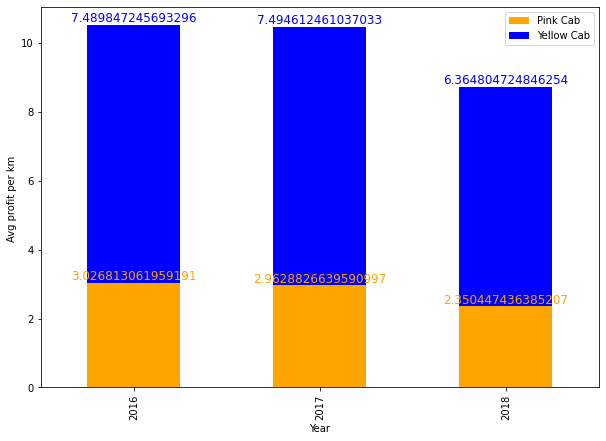

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))  

months = data_cab2['Company'].drop_duplicates()
margin_bottom = np.zeros(len(data_cab2['Year'].drop_duplicates()))
colors = ["#FFA500", "#0000FF","#74C476"]

for num, month in enumerate(months):
    values = list(data_cab2[data_cab2['Company'] == month].loc[:, 'profit_per_km'])

    data_cab2[data_cab2['Company'] == month].plot.bar(x='Year',y='profit_per_km', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
ax.set_ylabel('Avg profit per km ')
plt.show()

<AxesSubplot:title={'center':'red cab company'}, xlabel='Year'>

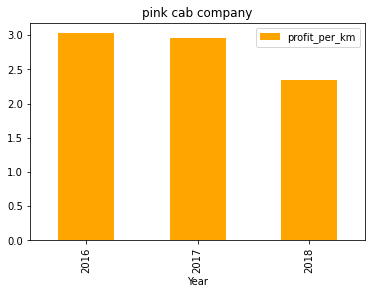

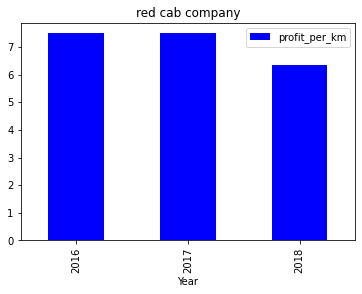

In [9]:
df1 = data_cab2[data_cab2["Company"]=='Pink Cab' ]
df2 = data_cab2[data_cab2["Company"]=='Yellow Cab' ]
df1.plot.bar(x='Year',color = {'Company': 'green', 'Year': 'green','profit_per_km':'orange'},title="pink cab company")
df2.plot.bar(x='Year',color = {'Company': 'green', 'Year': 'green','profit_per_km':'blue'},title="red cab company")


In [52]:
data_cab3 = data_cab.groupby( [ "City", "Company"] ).profit_per_km.sum().reset_index()
data_cab3

,City,Company,profit_per_km
0,ATLANTA GA,Pink Cab,4.261162e+03
1,ATLANTA GA,Yellow Cab,3.357569e+04
2,AUSTIN TX,Pink Cab,6.727824e+03
3,AUSTIN TX,Yellow Cab,1.687728e+04
4,BOSTON MA,Pink Cab,1.158875e+04
5,BOSTON MA,Yellow Cab,6.676822e+04
6,CHICAGO IL,Pink Cab,1.412048e+04
7,CHICAGO IL,Yellow Cab,1.352765e+05
8,DALLAS TX,Pink Cab,1.139042e+03
9,DALLAS TX,Yellow Cab,4.881536e+04


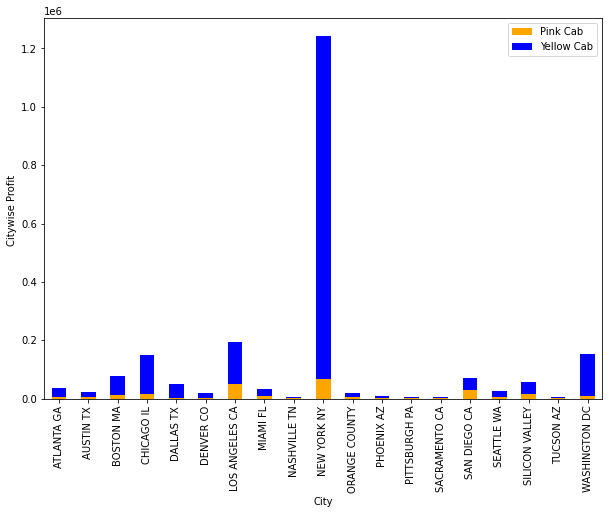

In [54]:
fig, ax = plt.subplots(figsize=(10,7))  

months = data_cab3['Company'].drop_duplicates()
margin_bottom = np.zeros(len(data_cab3['City'].drop_duplicates()))
colors = ["#FFA500", "#0000FF","#74C476"]

for num, month in enumerate(months):
    values = list(data_cab3[data_cab3['Company'] == month].loc[:, 'profit_per_km'])

    data_cab3[data_cab3['Company'] == month].plot.bar(x='City',y='profit_per_km', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

ax.set_ylabel('Citywise Profit ')
plt.show()

In [7]:
import pandas as pd
data_city = pd.read_csv("/home/elliot/DataSets/City1.csv")
data_cab = pd.read_csv("/home/elliot/DataSets/Cab_Data3.csv")
  
# using merge function by setting how='inner'
city_cab = pd.merge(data_city, data_cab, 
                   on='City', 
                   how='inner')
city_cab_transaction = pd.merge(city_cab, data_transaction_id, 
                   on='Transaction ID', 
                   how='inner')
all_data =  pd.merge(city_cab_transaction, data_customer_id, 
                   on='Customer ID', 
                   how='inner')
all_data = pd.read_csv("/home/elliot/DataSets/All.csv")
all_data

,Unnamed: 0,Unnamed: 0_x,City,Population,Users,Unnamed: 0_y,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year
0,0,0,NEW YORK NY,8405837,302149,128,10000139,2016-01-08,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,2016
1,1,0,NEW YORK NY,8405837,302149,5285,10006684,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,2016
2,2,0,NEW YORK NY,8405837,302149,12483,10015798,2016-03-13,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,2016
3,3,0,NEW YORK NY,8405837,302149,59833,10074689,2016-09-08,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,2016
4,4,0,NEW YORK NY,8405837,302149,63255,10078883,2016-09-18,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,19,BOSTON MA,248968,80021,292576,10359625,2018-08-11,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,2018
359388,359388,19,BOSTON MA,248968,80021,333631,10408986,2018-11-17,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,2018
359389,359389,19,BOSTON MA,248968,80021,285149,10350423,2018-07-22,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,2018
359390,359390,19,BOSTON MA,248968,80021,287964,10353979,2018-07-28,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,2018


In [8]:
gender_year_profit = all_data[["Gender", "Year","Income (USD/Month)","Company"]]
gender_year_profit

,Gender,Year,Income (USD/Month),Company
0,Male,2016,21399,Pink Cab
1,Male,2016,21399,Yellow Cab
2,Male,2016,21399,Yellow Cab
3,Male,2016,21399,Yellow Cab
4,Male,2016,21399,Pink Cab
...,...,...,...,...
359387,Female,2018,13380,Yellow Cab
359388,Female,2018,13380,Yellow Cab
359389,Female,2018,10658,Pink Cab
359390,Female,2018,27302,Yellow Cab


In [9]:
male_year_profit=gender_year_profit[gender_year_profit["Gender"]=="Male"]
female_year_profit=gender_year_profit[gender_year_profit["Gender"]=="Female"]
df6 = female_year_profit[['Year','Company','Income (USD/Month)']]
df7=df6.columns.values[2] = "income" 
df4 = male_year_profit[['Year','Company','Income (USD/Month)']]
df5=df4.columns.values[2] = "income" 
df6

,Year,Company,income
23053,2016,Yellow Cab,24768
23054,2016,Pink Cab,24768
23055,2016,Yellow Cab,24768
23056,2016,Yellow Cab,24768
23057,2016,Yellow Cab,24768
...,...,...,...
359387,2018,Yellow Cab,13380
359388,2018,Yellow Cab,13380
359389,2018,Pink Cab,10658
359390,2018,Yellow Cab,27302


In [10]:
data_cabb = df4.groupby( [ "Company", "Year"] ).income.mean().reset_index()
data_cabg = df6.groupby( [ "Company", "Year"] ).income.mean().reset_index()
data_cabg

,Company,Year,income
0,Pink Cab,2016,15232.784236
1,Pink Cab,2017,15066.180779
2,Pink Cab,2018,14952.779013
3,Yellow Cab,2016,15070.947609
4,Yellow Cab,2017,15064.287974
5,Yellow Cab,2018,15024.921990


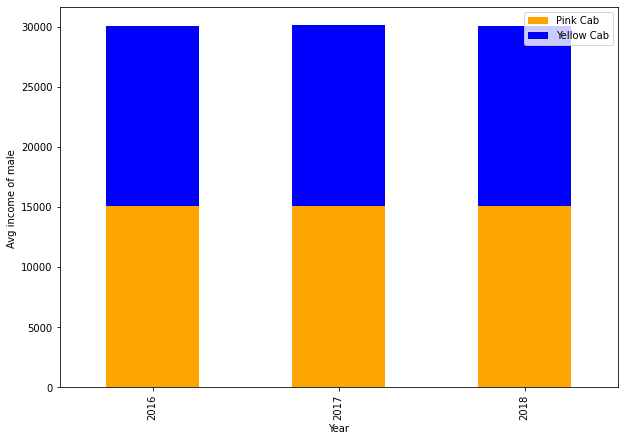

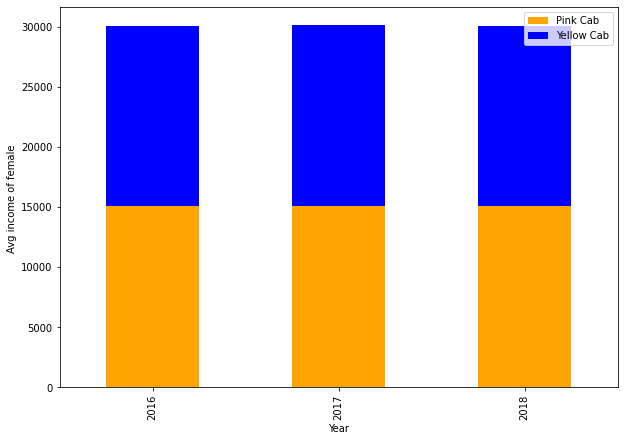

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))  

months = data_cabb['Company'].drop_duplicates()
margin_bottom = np.zeros(len(data_cabb['Year'].drop_duplicates()))
colors = ["#FFA500", "#0000FF","#74C476"]

for num, month in enumerate(months):
    values = list(data_cabb[data_cabb['Company'] == month].loc[:, 'income'])

    data_cabb[data_cabb['Company'] == month].plot.bar(x='Year',y='income', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values
ax.set_ylabel('Avg income of male ')
plt.show()



import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))  

months = data_cabb['Company'].drop_duplicates()
margin_bottom = np.zeros(len(data_cabb['Year'].drop_duplicates()))
colors = ["#FFA500", "#0000FF","#74C476"]

for num, month in enumerate(months):
    values = list(data_cabb[data_cabb['Company'] == month].loc[:, 'income'])

    data_cabb[data_cabb['Company'] == month].plot.bar(x='Year',y='income', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values
ax.set_ylabel('Avg income of female ')
plt.show()

In [15]:
"""There is almost equal distribution of gender in the Profit and customer base of both the cabs."""

'There is almost equal distribution of gender in the Profit and customer base of both the cabs.'

In [16]:
data_city = pd.read_csv("/home/elliot/DataSets/City1.csv")
data_cab = pd.read_csv("/home/elliot/DataSets/Cab_Data3.csv")
  
# using merge function by setting how='inner'
city_cab = pd.merge(data_city, data_cab, 
                   on='City', 
                   how='inner')
city_cab

,Unnamed: 0_x,City,Population,Users,Unnamed: 0_y,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,0,NEW YORK NY,8405837,302149,128,10000139,2016/01/08,Pink Cab,17.85,242.90,198.1350
1,0,NEW YORK NY,8405837,302149,129,10000140,2016/01/09,Pink Cab,25.30,407.21,255.5300
2,0,NEW YORK NY,8405837,302149,130,10000141,2016/01/06,Pink Cab,16.32,236.41,186.0480
3,0,NEW YORK NY,8405837,302149,131,10000142,2016/01/04,Pink Cab,12.43,194.61,144.1880
4,0,NEW YORK NY,8405837,302149,132,10000143,2016/01/09,Pink Cab,29.70,434.57,350.4600
...,...,...,...,...,...,...,...,...,...,...,...
359387,19,BOSTON MA,248968,80021,357670,10437872,2018/01/04,Yellow Cab,1.96,26.23,25.1664
359388,19,BOSTON MA,248968,80021,357671,10437873,2018/01/05,Yellow Cab,23.52,380.22,338.6880
359389,19,BOSTON MA,248968,80021,357672,10437874,2018/01/06,Yellow Cab,29.10,393.33,391.1040
359390,19,BOSTON MA,248968,80021,357673,10437875,2018/01/08,Yellow Cab,3.33,42.31,46.7532


In [22]:
mydf=city_cab[["City","Users","Company"]].reset_index()
mydf

,index,City,Users,Company
0,0,NEW YORK NY,302149,Pink Cab
1,1,NEW YORK NY,302149,Pink Cab
2,2,NEW YORK NY,302149,Pink Cab
3,3,NEW YORK NY,302149,Pink Cab
4,4,NEW YORK NY,302149,Pink Cab
...,...,...,...,...
359387,359387,BOSTON MA,80021,Yellow Cab
359388,359388,BOSTON MA,80021,Yellow Cab
359389,359389,BOSTON MA,80021,Yellow Cab
359390,359390,BOSTON MA,80021,Yellow Cab


In [27]:
mydf = mydf.drop_duplicates().reset_index()
mydf = mydf[["City","Users","Company"]]
mydf

,City,Users,Company
0,NEW YORK NY,302149,Pink Cab
1,NEW YORK NY,302149,Yellow Cab
2,CHICAGO IL,164468,Pink Cab
3,CHICAGO IL,164468,Yellow Cab
4,LOS ANGELES CA,144132,Pink Cab
5,LOS ANGELES CA,144132,Yellow Cab
6,MIAMI FL,17675,Pink Cab
7,MIAMI FL,17675,Yellow Cab
8,SILICON VALLEY,27247,Pink Cab
9,SILICON VALLEY,27247,Yellow Cab


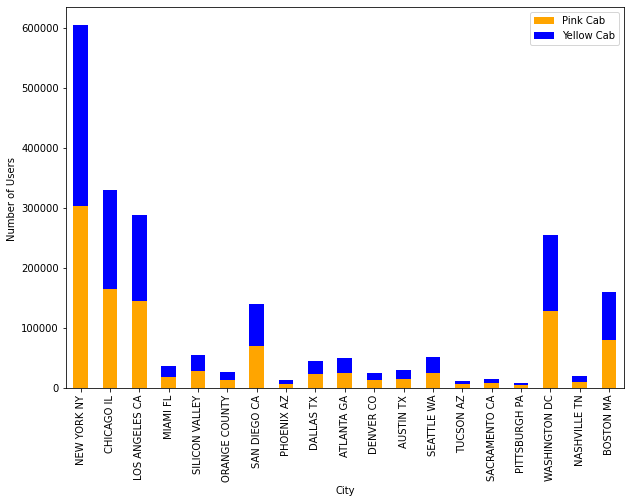

In [56]:
import pandas as pd
fig, ax = plt.subplots(figsize=(10,7))  

months = mydf['Company'].drop_duplicates()
margin_bottom = np.zeros(len(mydf['City'].drop_duplicates()))
colors = ["#FFA500", "#0000FF","#74C476"]

for num, month in enumerate(months):
    values = list(mydf[mydf['Company'] == month].loc[:, 'Users'])

    mydf[mydf['Company'] == month].plot.bar(x='City',y='Users', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

ax.set_ylabel('Number of Users ')
plt.show()

In [30]:
"""Out of 19 Cities
Pink cab have
higher customer
reach as compared
to Yellow cab ,in
following 4 cities:
• SanDiego
• Nashville
• Sacramento
• Pittsburgh"""

'Out of 19 Cities\nPink cab have\nhigher customer\nreach as compared\nto Yellow cab ,in\nfollowing 4 cities:\n• SanDiego\n• Nashville\n• Sacramento\n• Pittsburgh'

In [31]:
all_data

,Unnamed: 0,Unnamed: 0_x,City,Population,Users,Unnamed: 0_y,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year
0,0,0,NEW YORK NY,8405837,302149,128,10000139,2016-01-08,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399,2016
1,1,0,NEW YORK NY,8405837,302149,5285,10006684,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,2416,Cash,Male,28,21399,2016
2,2,0,NEW YORK NY,8405837,302149,12483,10015798,2016-03-13,Yellow Cab,19.20,559.30,264.9600,2416,Card,Male,28,21399,2016
3,3,0,NEW YORK NY,8405837,302149,59833,10074689,2016-09-08,Yellow Cab,14.84,322.28,179.8608,2416,Card,Male,28,21399,2016
4,4,0,NEW YORK NY,8405837,302149,63255,10078883,2016-09-18,Pink Cab,37.08,728.27,393.0480,2416,Card,Male,28,21399,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,19,BOSTON MA,248968,80021,292576,10359625,2018-08-11,Yellow Cab,33.04,459.13,444.0576,59005,Card,Female,24,13380,2018
359388,359388,19,BOSTON MA,248968,80021,333631,10408986,2018-11-17,Yellow Cab,35.96,559.79,496.2480,59005,Card,Female,24,13380,2018
359389,359389,19,BOSTON MA,248968,80021,285149,10350423,2018-07-22,Pink Cab,39.59,467.02,415.6950,59032,Card,Female,33,10658,2018
359390,359390,19,BOSTON MA,248968,80021,287964,10353979,2018-07-28,Yellow Cab,6.90,78.86,86.1120,58491,Card,Female,27,27302,2018


In [32]:
dfdf=all_data[["Company","Customer ID"]]
dfdf

,Company,Customer ID
0,Pink Cab,2416
1,Yellow Cab,2416
2,Yellow Cab,2416
3,Yellow Cab,2416
4,Pink Cab,2416
...,...,...
359387,Yellow Cab,59005
359388,Yellow Cab,59005
359389,Pink Cab,59032
359390,Yellow Cab,58491


In [33]:
df9=dfdf["Customer ID"].value_counts(dropna=False).reset_index()
df9

,index,Customer ID
0,494,54
1,2939,53
2,1070,51
3,2766,51
4,858,50
...,...,...
46143,15956,1
46144,10447,1
46145,39129,1
46146,32986,1


In [34]:
df9.columns.values[1] = "Number_Rides" 
df9.columns.values[0] = "Customer ID" 
df9

,Customer ID,Number_Rides
0,494,54
1,2939,53
2,1070,51
3,2766,51
4,858,50
...,...,...
46143,15956,1
46144,10447,1
46145,39129,1
46146,32986,1


In [35]:
merge = pd.merge(df9, dfdf, 
                   on='Customer ID', 
                   how='inner')
merge

,Customer ID,Number_Rides,Company
0,494,54,Yellow Cab
1,494,54,Yellow Cab
2,494,54,Yellow Cab
3,494,54,Yellow Cab
4,494,54,Pink Cab
...,...,...,...
1582807,12272,1,Yellow Cab
1582808,12272,1,Yellow Cab
1582809,12272,1,Yellow Cab
1582810,12272,1,Yellow Cab


Text(0.5, 1.02, 'Number of Rides of differrent companies in 3 Years')

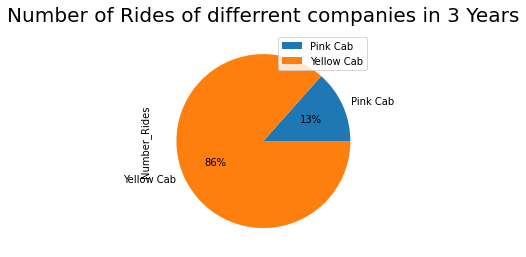

In [37]:
merge.groupby(['Company']).sum().plot(kind='pie', y='Number_Rides',autopct='%i%%')
plt.title("Number of Rides of differrent companies in 3 Years", fontsize=20, y=1.02)

In [38]:
merge1=merge.groupby('Company').Number_Rides.sum().reset_index()
merge1

,Company,Number_Rides
0,Pink Cab,1635092
1,Yellow Cab,10532892


In [39]:
dfdff=all_data[["Company","Customer ID","Year"]]
dfdff

,Company,Customer ID,Year
0,Pink Cab,2416,2016
1,Yellow Cab,2416,2016
2,Yellow Cab,2416,2016
3,Yellow Cab,2416,2016
4,Pink Cab,2416,2016
...,...,...,...
359387,Yellow Cab,59005,2018
359388,Yellow Cab,59005,2018
359389,Pink Cab,59032,2018
359390,Yellow Cab,58491,2018


In [40]:
df0=dfdff["Customer ID"].value_counts(dropna=False).reset_index()
df0

,index,Customer ID
0,494,54
1,2939,53
2,1070,51
3,2766,51
4,858,50
...,...,...
46143,15956,1
46144,10447,1
46145,39129,1
46146,32986,1


In [41]:
df0.columns.values[1] = "Number_Rides" 
df0.columns.values[0] = "Customer ID" 
df0

,Customer ID,Number_Rides
0,494,54
1,2939,53
2,1070,51
3,2766,51
4,858,50
...,...,...
46143,15956,1
46144,10447,1
46145,39129,1
46146,32986,1


In [42]:
mergee = pd.merge(df0, dfdff, 
                   on='Customer ID', 
                   how='inner')
mergee

,Customer ID,Number_Rides,Company,Year
0,494,54,Yellow Cab,2016
1,494,54,Yellow Cab,2016
2,494,54,Yellow Cab,2016
3,494,54,Yellow Cab,2016
4,494,54,Pink Cab,2016
...,...,...,...,...
1582807,12272,1,Yellow Cab,2018
1582808,12272,1,Yellow Cab,2018
1582809,12272,1,Yellow Cab,2018
1582810,12272,1,Yellow Cab,2018


In [43]:
mergee=mergee.groupby(['Company','Year']).Number_Rides.sum().reset_index()
mergee

,Company,Year,Number_Rides
0,Pink Cab,2016,505635
1,Pink Cab,2017,593146
2,Pink Cab,2018,536311
3,Yellow Cab,2016,3250590
4,Yellow Cab,2017,3616353
5,Yellow Cab,2018,3665949


Text(0.5, 1.02, 'Number of Rides of differrent companies in Each Year')

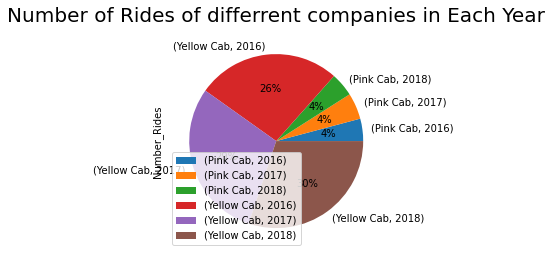

In [45]:
mergee.groupby(['Company','Year']).sum().plot(kind='pie', y='Number_Rides',autopct='%i%%')
plt.title("Number of Rides of differrent companies in Each Year", fontsize=20, y=1.02)

In [46]:
"""The Above Results shows Customer Retention also"""

'The Above Results shows Customer Retention also'